In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [51]:
import os
print(os.listdir("../data/raw"))


['RT_IOT2022']


In [52]:
import pandas as pd

data_path = "../data/raw/RT_IOT2022"
df = pd.read_csv(data_path)

df.head()

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


#### Validates the dataset schema and establishes a reliable baseline for the remaining exploratory analysis.

- The dataset contains 123,117 network-flow records and 85 columns.

- Feature types are predominantly numeric: 56 float64 and 26 int64 columns, with only 3 object columns.

- The object columns are proto, service, and Attack_type, which aligns with expectations for a flow-based IDS dataset: most features are quantitative flow statistics, while protocol/service are categorical descriptors and Attack_type is the label.

- Memory usage is approximately 80–96 MB.

In [53]:
print("Value Count: ",df.dtypes.value_counts())
print("\nMemory usage (MB):", round(df.memory_usage(deep=True).sum() / (1024**2), 2))
print("\nShape:", df.shape)
print("\n Dataset Info:\n")
df.info()
print("\n Dataset Columns:\n")
df.columns

Value Count:  float64    56
int64      26
object      3
Name: count, dtype: int64

Memory usage (MB): 96.33

Shape: (123117, 85)

 Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_p

Index(['Unnamed: 0', 'id.orig_p', 'id.resp_p', 'proto', 'service',
       'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.

#### Glimps of the data

In [54]:
df.head(3)

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish


#### Helper function to print the values

In [55]:
def get_column_groups(df, target_col="Attack_type"):
    """Return (numeric_cols, categorical_cols) excluding target."""
    numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
    categorical_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

    if target_col in numeric_cols:
        numeric_cols.remove(target_col)
    if target_col in categorical_cols:
        categorical_cols.remove(target_col)

    return numeric_cols, categorical_cols

def print_section(title):
    """Print a readable section header."""
    print("\n" + "=" * 80)
    print(title)
    print("=" * 80)

#### Missing Values & Data Completeness

- There is no missing value
- There are no missing values in any column (all columns show 123,117 non-null), which reduces the need for imputation and lowers risk of bias introduced by missingness handling.


In [56]:
def eda_missingness(df, top_n=25):
    print_section("Display missing values \n")

    missing_count = df.isna().sum()
    missing_pct = (missing_count / len(df)) * 100

    missing_df = (
        pd.DataFrame({"missing_count": missing_count, "missing_pct": missing_pct})
        .sort_values("missing_count", ascending=False)
    )

    print("Top columns by missingness:")
    display(missing_df.head(top_n))

    total_missing_cells = int(df.isna().sum().sum())
    print("\nTotal missing cells:", total_missing_cells)

    # Plot missingness for non-zero missing columns only
    non_zero = missing_df[missing_df["missing_count"] > 0]
    if len(non_zero) > 0:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=non_zero["missing_pct"].values[:top_n], y=non_zero.index[:top_n])
        plt.title("Missingness Percentage (Top Columns)")
        plt.xlabel("Missing %")
        plt.ylabel("Column")
        plt.tight_layout()
        plt.show()
    else:
        print("No missing values detected in this dataset.")

eda_missingness(df)



Display missing values 

Top columns by missingness:


,missing_count,missing_pct
Unnamed: 0,0,0.0
id.orig_p,0,0.0
id.resp_p,0,0.0
proto,0,0.0
service,0,0.0
flow_duration,0,0.0
fwd_pkts_tot,0,0.0
bwd_pkts_tot,0,0.0
fwd_data_pkts_tot,0,0.0
bwd_data_pkts_tot,0,0.0



Total missing cells: 0
No missing values detected in this dataset.


#### Exact Duplicate Rows
- There is no Duplicate rows


In [57]:
def eda_duplicates(df):
    print_section("Exact Duplicate Rows")

    dup_mask = df.duplicated()
    dup_count = int(dup_mask.sum())
    print("Exact duplicate rows:", dup_count)

    if dup_count > 0:
        print("\nSample duplicate rows (first 5):")
        display(df[dup_mask].head(5))

eda_duplicates(df)



Exact Duplicate Rows
Exact duplicate rows: 0


#### Constant / Near-Constant Features

Identifies constant and near-constant features that contribute little to learning and can introduce unnecessary complexity 

into an intrusion detection pipeline. In the dataset, some TCP flag fields or bulk transfer fields may remain 

mostly zero because they are only triggered under specific traffic conditions. Detecting these features early helps reduce noise, 

improve training stability, and optimize model performance. Constant features cannot help a model differentiate normal vs attack traffic. 
Keeping them only increases dimensionality without adding signal. Near-constant features can reduce learning efficiency and can mislead 
some models into over-weighting rare values, especially if rare values correlate with a small subset of classes.

This analysis shows that at least one TCP-flag feature is completely non-informative (bwd_URG_flag_count), and several others are effectively inactive for almost all records. Removing constant (and optionally near-constant) features improves computational efficiency and ensures downstream IDS models focus on the flow statistics that actually vary and characterize malicious behavior.

In [58]:
def eda_constant_features(df, target_col="Attack_type", near_constant_threshold=0.995):
    print_section("Constant / Near-Constant Features")

    numeric_cols, categorical_cols = get_column_groups(df, target_col=target_col)

    # Constant features (single unique value)
    nunique = df[numeric_cols + categorical_cols].nunique(dropna=False)
    constant_cols = nunique[nunique <= 1].index.tolist()

    print("Constant columns:", constant_cols if constant_cols else "None")

    # Near-constant features: most common value dominates
    near_constant_cols = []
    for col in numeric_cols + categorical_cols:
        top_freq = df[col].value_counts(dropna=False, normalize=True).iloc[0]
        if top_freq >= near_constant_threshold:
            near_constant_cols.append((col, top_freq))

    near_constant_cols = sorted(near_constant_cols, key=lambda x: x[1], reverse=True)

    print(f"\nNear-constant columns (>= {near_constant_threshold*100:.1f}% same value):")
    if near_constant_cols:
        display(pd.DataFrame(near_constant_cols, columns=["column", "top_value_fraction"]))
    else:
        print("None")

eda_constant_features(df, target_col="Attack_type")



Constant / Near-Constant Features
Constant columns: ['bwd_URG_flag_count']

Near-constant columns (>= 99.5% same value):


,column,top_value_fraction
0,bwd_URG_flag_count,1.000000
1,flow_CWR_flag_count,0.999423
2,flow_ECE_flag_count,0.999415
3,fwd_bulk_bytes,0.998002
4,fwd_bulk_packets,0.998002
5,fwd_bulk_rate,0.998002


#### Target Distribution & Imbalance

Evaluates the distribution of the target label (Attack_type) to quantify class imbalance, which is one of the most important factors affecting intrusion detection system (IDS) model behavior. In datasets, severe imbalance is common because normal traffic and certain high volume attacks can dominate the capture. Understanding imbalance early prevents misleading conclusions such as high overall accuracy while failing to detect rare but high-impact attacks.

The dataset is highly imbalanced:

- DOS_SYN_Hping dominates the dataset with 94,659 flows (76.89%).
This single attack type represents more than three quarters of all records, making it the primary driver of overall accuracy if not handled carefully.

- The next-largest classes are far smaller:

    - Thing_Speak: 8,108 (6.59%)

    - ARP_poisioning: 7,750 (6.29%)

    - MQTT_Publish: 4,146 (3.37%)

- Several attack categories are minority classes:

    - NMAP_UDP_SCAN: 2,590 (2.10%)

    - NMAP_XMAS_TREE_SCAN: 2,010 (1.63%)

    - NMAP_OS_DETECTION: 2,000 (1.62%)

    - NMAP_TCP_scan: 1,002 (0.81%)

    - DDOS_Slowloris: 534 (0.43%)

- Rare classes (< 500 samples):

    - Wipro_bulb: 253 (0.21%)

    - Metasploit_Brute_Force_SSH: 37 (0.03%)

    - NMAP_FIN_SCAN: 28 (0.02%)

This imbalance has direct consequences:

- Accuracy can be misleading A model that predicts “DOS_SYN_Hping” most of the time could achieve high overall accuracy while missing rare attacks entirely.

- Minority-class recall becomes the key metric For IDS, false negatives on rare attacks are costly. You must evaluate with per-class recall, precision, and F1 (and preferably a confusion matrix), not just accuracy.

- Training strategy must address imbalance This dataset will require one or more of the following in later modeling stages:

    - stratified splitting,

    - class weights,

    - resampling techniques,

    - grouping into binary labels (Attack vs Normal) for some tasks,

    - macro-averaged metrics.

- Model bias risk Without mitigation, the trained IDS may be biased toward detecting the dominant SYN flood pattern and underperform on reconnaissance and credential-based attacks.



 Target Distribution / Class Imbalance
Class distribution (all):


,count,pct
Attack_type,,
DOS_SYN_Hping,94659,76.885402
Thing_Speak,8108,6.585606
ARP_poisioning,7750,6.294825
MQTT_Publish,4146,3.367528
NMAP_UDP_SCAN,2590,2.103690
NMAP_XMAS_TREE_SCAN,2010,1.632593
NMAP_OS_DETECTION,2000,1.624471
NMAP_TCP_scan,1002,0.813860
DDOS_Slowloris,534,0.433734


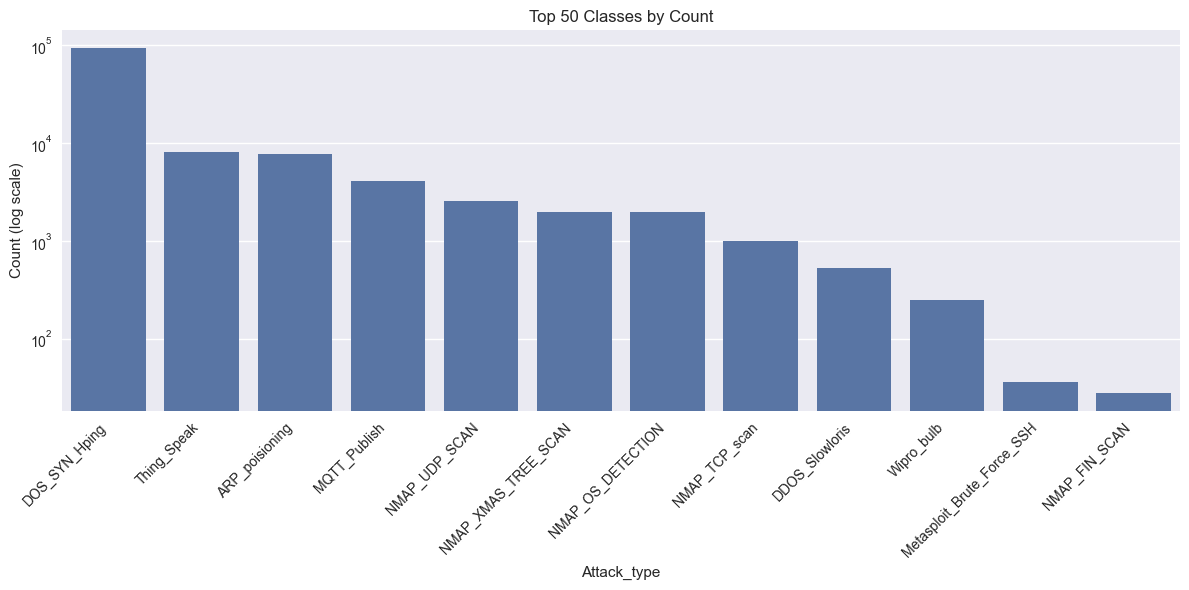


Rare classes (< 500 samples):


,count,pct
Attack_type,,
NMAP_FIN_SCAN,28,0.022743
Metasploit_Brute_Force_SSH,37,0.030053
Wipro_bulb,253,0.205496


In [59]:
def eda_target_distribution(df, target_col="Attack_type", top_n=20, log_scale=True):
    print_section(" Target Distribution / Class Imbalance")

    counts = df[target_col].value_counts()
    pct = (counts / counts.sum()) * 100
    summary = pd.DataFrame({"count": counts, "pct": pct})

    print("Class distribution (all):")
    display(summary)

    plt.figure(figsize=(12, 6))
    plot_counts = counts.head(top_n)
    sns.barplot(x=plot_counts.index, y=plot_counts.values)
    plt.title(f"Top {top_n} Classes by Count")
    plt.xlabel("Attack_type")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    if log_scale:
        plt.yscale("log")
        plt.ylabel("Count (log scale)")
    plt.tight_layout()
    plt.show()

    # Rare class list
    rare = summary[summary["count"] < 500].sort_values("count")
    print("\nRare classes (< 500 samples):")
    display(rare)

eda_target_distribution(df, target_col="Attack_type", top_n=50, log_scale=True)


##### Categorical Profiling (proto/service)

Analyzes the categorical network descriptors proto (protocol) and service (application/service classification). In an IoT intrusion detection system (IDS), protocol and service context often provide strong discriminative signal because many attacks target specific protocols or appear on particular services.

The dataset exhibits simple categorical structure (3 protocols, 10 services), which supports clean preprocessing. However, service labels are heavily dominated by “-”, indicating that service inference is limited for most flows. For IDS modeling, proto is likely to be a strong contextual feature, while service may provide high value mainly in a subset of flows.


Categorical Profiling

Unique values in proto: 3


proto
tcp     110427
udp      12633
icmp        57
Name: count, dtype: int64

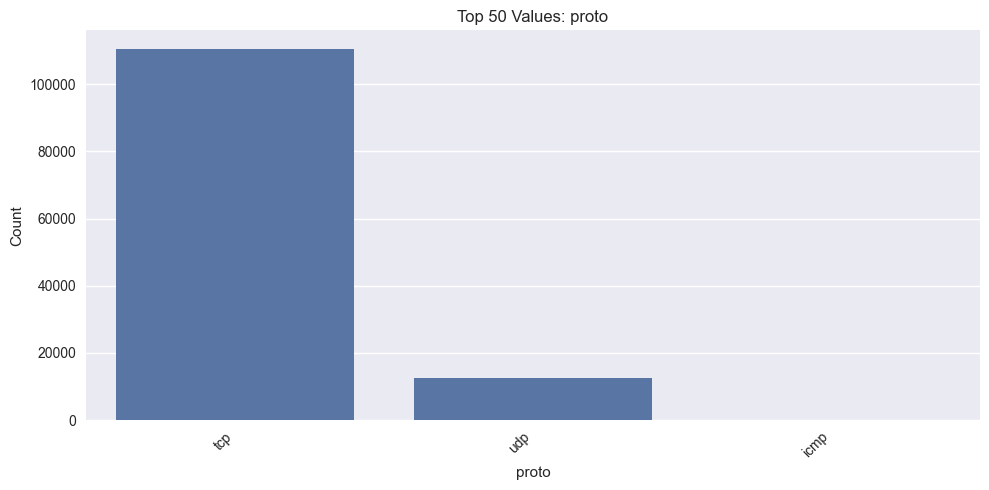


Unique values in service: 10


service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: count, dtype: int64

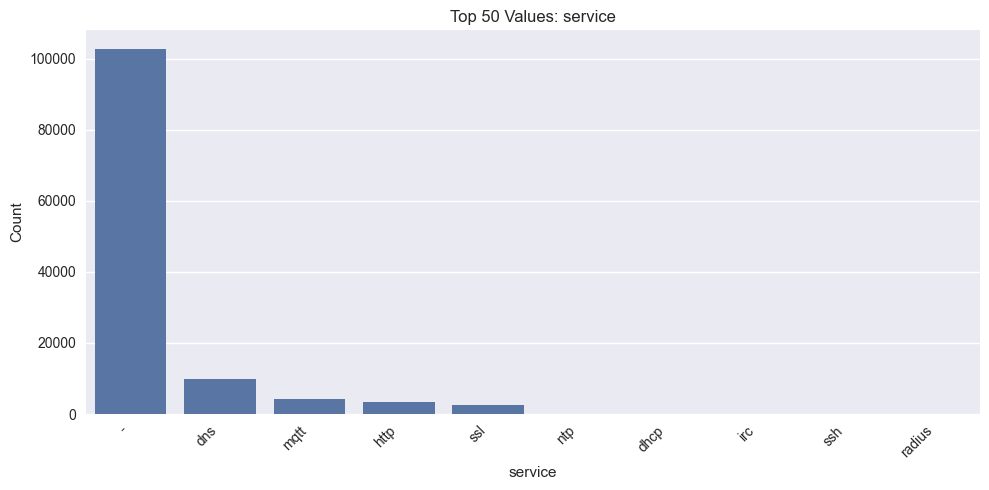

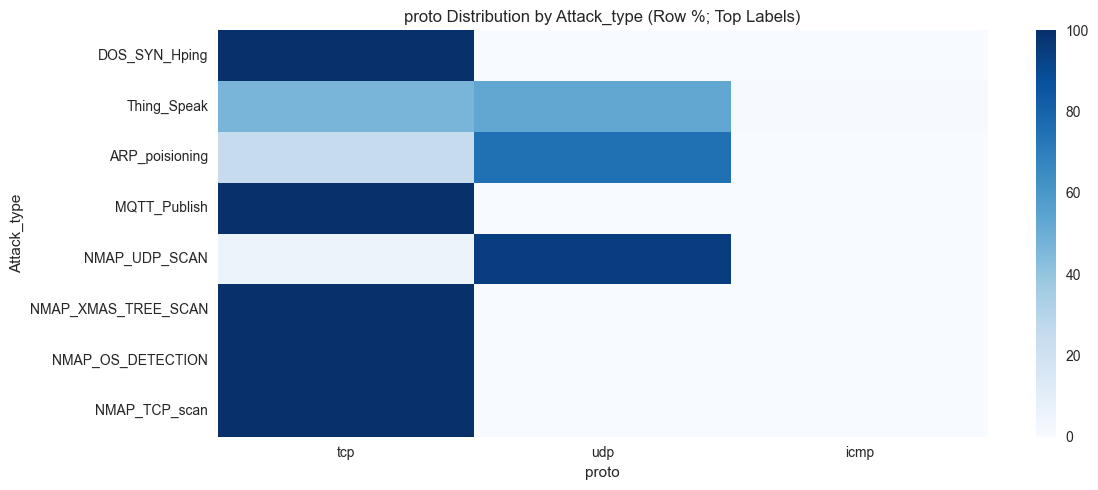

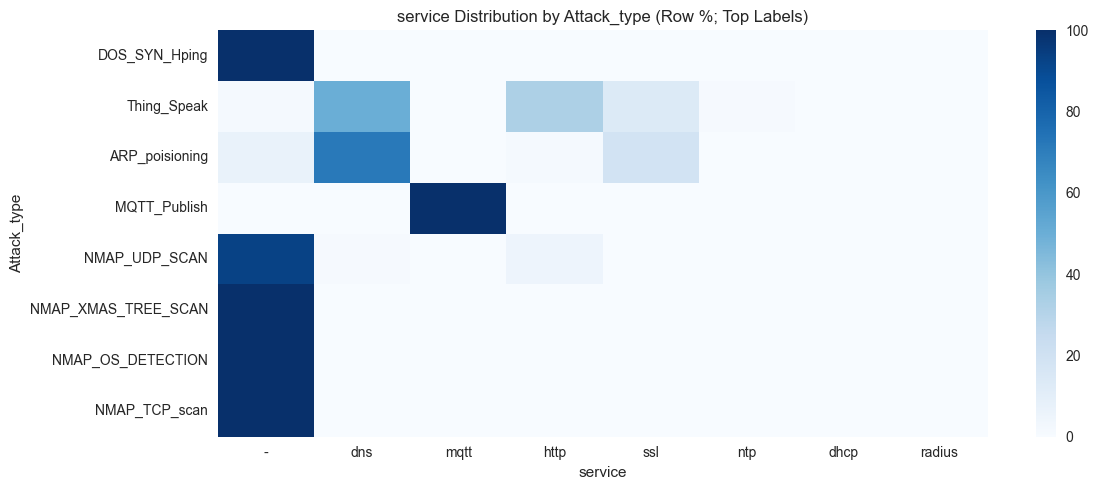

In [60]:
def eda_categorical_overview(df, target_col="Attack_type", categorical_cols=("proto", "service"), top_n=50):
    print_section("Categorical Profiling")

    for col in categorical_cols:
        if col not in df.columns:
            print(f"Column '{col}' not found. Skipping.")
            continue

        print(f"\nUnique values in {col}: {df[col].nunique()}")
        display(df[col].value_counts().head(top_n))

        plt.figure(figsize=(10, 5))
        vc = df[col].value_counts().head(top_n)
        sns.barplot(x=vc.index, y=vc.values)
        plt.title(f"Top {top_n} Values: {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

    # Cross-tab with target (top labels only to keep readable)
    top_labels = df[target_col].value_counts().head(8).index.tolist()
    df_small = df[df[target_col].isin(top_labels)].copy()

    for col in categorical_cols:
        if col not in df.columns:
            continue

        ct = pd.crosstab(df_small[target_col], df_small[col], normalize="index") * 100
        ct = ct.loc[top_labels]  # preserve order

        # Limit columns to top categories for readability
        top_cats = df[col].value_counts().head(top_n).index
        ct = ct[top_cats.intersection(ct.columns)]

        plt.figure(figsize=(12, 5))
        sns.heatmap(ct, annot=False, cmap="Blues")
        plt.title(f"{col} Distribution by Attack_type (Row %; Top Labels)")
        plt.xlabel(col)
        plt.ylabel(target_col)
        plt.tight_layout()
        plt.show()

eda_categorical_overview(df, target_col="Attack_type", categorical_cols=("proto", "service"), top_n=50)


##### Port Profiling By Label

profiles source ports (id.orig_p) and destination ports (id.resp_p) to understand which services are being targeted and how attacks manifest at the transport layer. In IoT intrusion detection, port behavior is a practical indicator of both (1) normal device communication patterns and (2) attack intent, such as brute-force attempts against remote administration ports or scanning activity across many ports.
Port profiling demonstrates that dataset contains strong and interpretable attack to port signatures (e.g., SYN flood targeting port 21, Slowloris targeting port 80, brute force targeting port 22, MQTT traffic targeting port 1883). These results are highly valuable for both cybersecurity interpretation and IDS feature design. However, the strength of these signatures also highlights a generalization risk: models may over-rely on destination ports unless trained and evaluated with robust metrics and complementary behavioral features.


 Port Profiling (Cybersecurity)

Top 50 values for id.orig_p (overall):


id.orig_p
46600    1002
36242    1002
59247    1001
51036    1001
64177     834
50078     813
5353      230
64178     230
50079     222
68         50
133        25
50080      21
64179      21
64180      19
50081      19
50082      19
50083      16
64181      16
50084      14
33802      14
64182      14
64183      14
143        13
3          12
52216       9
52326       9
52334       9
52390       8
57720       8
52230       8
36685       8
52220       8
50085       8
57658       7
41419       7
52528       7
52332       7
52388       7
46015       7
58120       7
135         7
37153       7
57742       7
42557       7
52232       7
54011       7
60800       7
60672       7
51478       7
60706       7
Name: count, dtype: int64

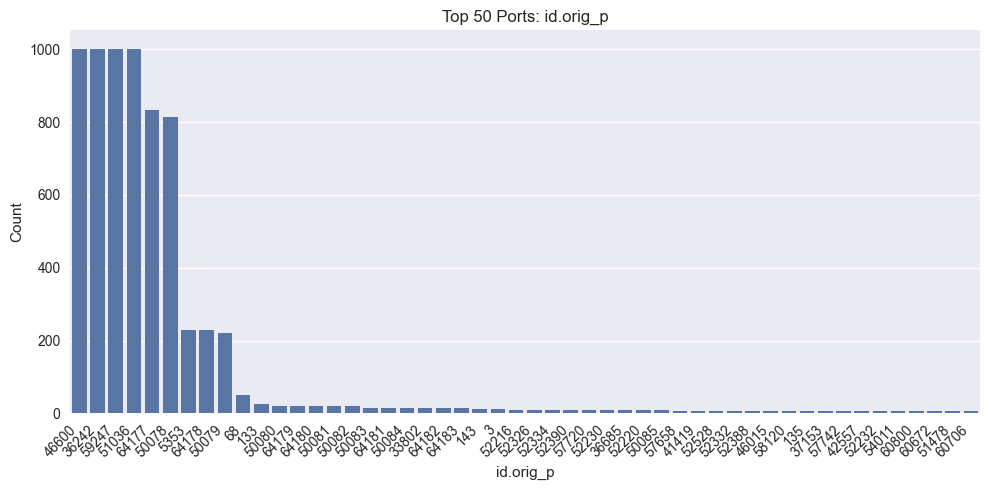


Top ports per label for id.orig_p (top 50 labels):

Label: DOS_SYN_Hping


id.orig_p
2862    5
2933    5
7747    5
6188    5
2970    4
3526    4
5094    4
3527    4
3581    4
2840    4
3007    4
3008    4
3288    4
5340    4
3595    4
3291    4
3324    4
3014    4
3132    4
3325    4
3134    4
6618    4
3405    4
3406    4
3021    4
3532    4
2851    4
5319    4
5001    4
8157    4
3535    4
7650    4
7410    4
3112    4
3029    4
5483    4
5242    4
3590    4
2899    4
3001    4
3002    4
3003    4
3634    4
3307    4
2873    4
3340    4
6632    4
3251    4
3252    4
8990    4
Name: count, dtype: int64


Label: Thing_Speak


id.orig_p
5353     103
133       24
68        14
143       11
135        5
57328      4
60800      4
58136      4
38150      4
60756      4
53367      4
60628      4
60772      4
37458      4
58113      4
58788      4
37818      3
60804      3
38098      3
38258      3
38194      3
37153      3
38196      3
40841      3
33350      3
38104      3
37972      3
38334      3
37974      3
38106      3
60588      3
36874      3
60720      3
60810      3
60592      3
60872      3
38300      3
34082      3
38524      3
40982      3
58116      3
32982      3
60600      3
60816      3
60035      3
38206      3
49035      3
38266      3
37994      3
45395      3
Name: count, dtype: int64


Label: ARP_poisioning


id.orig_p
5353     99
68       26
33802    13
52220     6
52136     6
52334     6
52390     6
52216     6
52326     6
52104     5
52332     5
52218     5
52388     5
52222     5
52228     5
52230     5
52232     5
52234     5
52712     5
52330     5
52710     5
33542     4
54011     4
52986     4
52716     4
52842     4
52698     4
40963     3
60505     3
46316     3
33344     3
60506     3
57732     3
55034     3
56207     3
58350     3
51478     3
47132     3
34380     3
42602     3
59336     3
52148     3
57742     3
41021     3
41214     3
43902     3
38622     3
44904     3
59477     3
58056     3
Name: count, dtype: int64


Label: MQTT_Publish


id.orig_p
36685    7
46015    4
60893    4
54795    3
34245    3
47771    3
42461    3
38179    3
60787    3
60681    3
38067    3
52281    3
57311    3
47401    3
51919    3
44473    3
54875    3
49181    3
47633    3
46757    3
42327    3
54239    3
46181    3
49793    3
55115    3
36673    3
42519    3
57923    3
57621    3
58621    3
35167    3
44663    3
42113    3
60153    3
54403    3
50797    3
38361    3
60931    3
33131    3
41419    3
50975    3
51333    3
39395    3
52245    3
42633    3
42603    2
38553    2
36509    2
34587    2
35859    2
Name: count, dtype: int64


Label: NMAP_UDP_SCAN


id.orig_p
64177    832
50078    812
64178    228
50079    221
64179     20
5353      19
50080     19
50081     18
64180     17
64181     15
50082     15
50083     14
64183     13
64182     13
50084     12
50085      5
64184      4
59342      3
64185      3
50086      3
50087      2
68         2
3          2
51508      1
64254      1
50151      1
64253      1
50150      1
64252      1
50149      1
64251      1
42902      1
38261      1
64240      1
50138      1
64241      1
50139      1
64242      1
50140      1
64243      1
50141      1
64244      1
50142      1
64245      1
50143      1
64246      1
50144      1
64247      1
50145      1
51616      1
Name: count, dtype: int64


Label: NMAP_XMAS_TREE_SCAN


id.orig_p
59247    1000
36242    1000
59248       3
36243       3
42501       1
41729       1
52980       1
58680       1
Name: count, dtype: int64


Label: NMAP_OS_DETECTION


id.orig_p
46600    1000
51036    1000
Name: count, dtype: int64


Label: NMAP_TCP_scan


id.orig_p
43680    3
55916    2
42490    2
43970    2
53396    2
49516    2
35104    2
49230    2
52526    2
52630    2
59222    2
58592    2
35524    2
56164    2
42890    2
37390    2
35572    2
53986    2
56964    2
54100    2
52640    2
46152    2
56446    2
55588    2
38064    2
60154    2
37134    2
52112    2
56562    2
51608    2
52528    2
52612    2
54686    2
58870    1
59588    1
39948    1
60146    1
49546    1
41068    1
37580    1
35986    1
45234    1
40572    1
58900    1
36020    1
40732    1
46646    1
32832    1
43538    1
57108    1
Name: count, dtype: int64


Label: DDOS_Slowloris


id.orig_p
5353     3
68       2
51312    1
51314    1
51316    1
51318    1
51320    1
51322    1
51324    1
51326    1
51328    1
51330    1
51332    1
51334    1
51336    1
51338    1
51340    1
51342    1
51344    1
51346    1
51348    1
51350    1
51352    1
51354    1
51356    1
51358    1
51360    1
51362    1
51364    1
51366    1
51368    1
51370    1
51372    1
51374    1
51376    1
51378    1
51380    1
51382    1
51384    1
51386    1
51388    1
51390    1
51392    1
51394    1
51396    1
51398    1
51400    1
51402    1
51404    1
51406    1
Name: count, dtype: int64


Label: Wipro_bulb


id.orig_p
62969    5
68       5
52892    5
52196    4
50161    4
49797    2
52170    2
49807    2
49809    2
52172    2
34177    2
49811    2
49800    2
62443    2
49795    2
32370    2
49817    2
49819    2
52174    2
3716     2
49822    2
49825    2
49827    2
52175    2
46652    2
49830    2
49832    2
49834    2
49813    2
52171    2
49056    2
40545    2
6334     2
52197    2
50158    2
50173    2
50171    2
50168    2
50164    2
52205    2
52202    2
50194    2
8886     2
52203    2
52176    2
49815    2
52173    2
3        2
53100    2
50187    1
Name: count, dtype: int64


Label: Metasploit_Brute_Force_SSH


id.orig_p
5353     4
59853    1
58684    1
48711    1
32954    1
44105    1
42017    1
37025    1
41947    1
33639    1
39519    1
33695    1
43445    1
42215    1
43633    1
34765    1
40171    1
43465    1
33853    1
40407    1
43951    1
39219    1
46419    1
33507    1
46731    1
35385    1
44029    1
44691    1
45949    1
41439    1
36531    1
33805    1
35275    1
41715    1
Name: count, dtype: int64


Label: NMAP_FIN_SCAN


id.orig_p
54610    1
50877    1
57535    1
33781    1
47630    1
47631    1
65012    1
65013    1
53043    1
53044    1
65035    1
65036    1
60669    1
60670    1
37559    1
37560    1
39622    1
39623    1
59043    1
59044    1
40295    1
40296    1
45101    1
45102    1
54172    1
54173    1
56868    1
56869    1
Name: count, dtype: int64


Top 50 values for id.resp_p (overall):


id.resp_p
21       94665
53        7210
1883      4142
80        3523
443       3191
5353      2171
137        384
123        121
17417       75
829         73
22          62
6668        61
67          51
631         25
134         24
50003       22
50002       22
50001       22
1900        21
8886        17
6667        16
5003        14
0           14
513         14
1025        13
990         13
5050        13
1718        13
3           13
3702        12
49178       11
18991       10
6004        10
135         10
1000        10
32776        9
1124         9
1070         9
48489        9
34079        9
1761         9
1234         9
7938         9
8888         9
17787        9
1048         8
1            8
49176        8
7000         8
19956        8
Name: count, dtype: int64

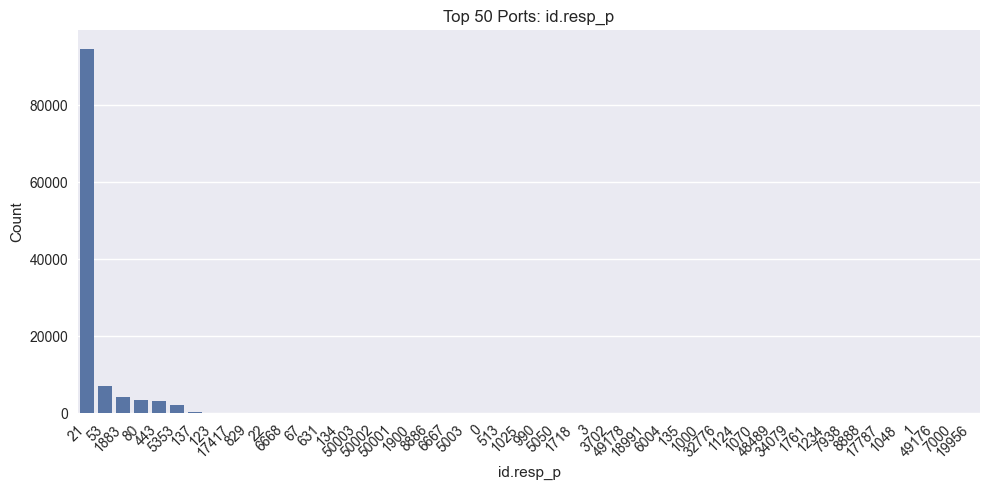


Top ports per label for id.resp_p (top 50 labels):

Label: DOS_SYN_Hping


id.resp_p
21    94659
Name: count, dtype: int64


Label: Thing_Speak


id.resp_p
53       3963
80       2668
443      1118
123       110
5353      103
134        24
50003      17
50002      17
50001      17
67         14
1900       13
0          11
3702        8
136         5
5223        4
5228        3
5355        2
137         2
135         2
547         2
5222        2
3           2
1           1
Name: count, dtype: int64


Label: ARP_poisioning


id.resp_p
53      3166
5353    2036
443     1957
137      381
80       167
67        26
123        7
0          3
8888       2
8          2
3          2
136        1
Name: count, dtype: int64


Label: MQTT_Publish


id.resp_p
1883    4142
80         4
Name: count, dtype: int64


Label: NMAP_UDP_SCAN


id.resp_p
80       145
17417     75
829       73
5353      25
631       20
53        13
49178     11
18991     10
513        9
17787      9
48489      9
34079      9
5003       9
990        8
177        8
17533      8
1718       8
47915      8
51456      8
16832      8
47765      8
5050       8
1025       8
19956      8
19193      8
57843      8
27444      8
36384      8
37813      7
42639      7
688        6
35777      6
18373      6
28369      5
20154      5
6004       5
1000       5
43514      5
17823      4
17077      4
31073      4
7938       4
17091      4
22055      4
49199      4
20082      4
3702       4
18449      4
55587      4
3664       4
Name: count, dtype: int64


Label: NMAP_XMAS_TREE_SCAN


id.resp_p
80       5
53       5
22       4
8084     4
20005    2
587      2
21571    2
8888     2
993      2
49159    2
113      2
199      2
256      2
1025     2
143      2
3389     2
110      2
25       2
995      2
23       2
554      2
111      2
3306     2
8080     2
135      2
445      2
1723     2
5900     2
3077     2
1041     2
8021     2
15002    2
1113     2
1091     2
2968     2
2323     2
255      2
464      2
3889     2
1057     2
2004     2
900      2
42       2
1029     2
2038     2
3517     2
5510     2
5405     2
4129     2
1053     2
Name: count, dtype: int64


Label: NMAP_OS_DETECTION


id.resp_p
1862     2
1723     2
443      2
135      2
22       2
995      2
143      2
21       2
2170     2
6025     2
13456    2
8180     2
32775    2
11111    2
6123     2
18101    2
19350    2
1053     2
8045     2
5051     2
8000     2
8099     2
34572    2
1145     2
9050     2
1042     2
1029     2
843      2
1052     2
7201     2
37       2
9415     2
1087     2
50006    2
1065     2
416      2
25       2
113      2
1025     2
3389     2
3998     2
6346     2
2920     2
545      2
16018    2
27353    2
1059     2
3971     2
15000    2
5357     2
Name: count, dtype: int64


Label: NMAP_TCP_scan


id.resp_p
8888     3
56737    1
55600    1
17       1
65389    1
1        1
3        1
4        1
50389    1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
30       1
32       1
33       1
37       1
42       1
43       1
7        1
53       1
70       1
79       1
80       1
81       1
82       1
83       1
84       1
85       1
88       1
89       1
90       1
99       1
100      1
106      1
109      1
110      1
111      1
113      1
119      1
125      1
135      1
139      1
143      1
144      1
146      1
Name: count, dtype: int64


Label: DDOS_Slowloris


id.resp_p
80      529
5353      3
67        2
Name: count, dtype: int64


Label: Wipro_bulb


id.resp_p
443      107
6668      56
53        53
8886      17
6667      11
67         5
1          2
40127      1
40049      1
Name: count, dtype: int64


Label: Metasploit_Brute_Force_SSH


id.resp_p
22      28
53       4
5353     4
80       1
Name: count, dtype: int64


Label: NMAP_FIN_SCAN


id.resp_p
22    24
53     3
80     1
Name: count, dtype: int64

In [61]:
def top_values_by_label(df, label_col, feature_col, top_labels=8, top_values=10):
    """Return a dictionary: label -> top values df."""
    results = {}
    labels = df[label_col].value_counts().head(top_labels).index.tolist()
    for lab in labels:
        sub = df[df[label_col] == lab]
        vc = sub[feature_col].value_counts().head(top_values)
        results[lab] = vc
    return results

def eda_port_analysis(df, target_col="Attack_type", port_cols=("id.orig_p", "id.resp_p"), top_n=50, top_labels=50):
    print_section(" Port Profiling (Cybersecurity)")

    for col in port_cols:
        if col not in df.columns:
            print(f"Column '{col}' not found. Skipping.")
            continue

        print(f"\nTop {top_n} values for {col} (overall):")
        display(df[col].value_counts().head(top_n))

        plt.figure(figsize=(10, 5))
        vc = df[col].value_counts().head(top_n)
        sns.barplot(x=vc.index.astype(str), y=vc.values)
        plt.title(f"Top {top_n} Ports: {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

        print(f"\nTop ports per label for {col} (top {top_labels} labels):")
        per_label = top_values_by_label(df, target_col, col, top_labels=top_labels, top_values=50)
        for lab, vc_lab in per_label.items():
            print(f"\nLabel: {lab}")
            display(vc_lab)

eda_port_analysis(df, target_col="Attack_type", port_cols=("id.orig_p", "id.resp_p"), top_n=50, top_labels=50)


##### Numeric Summary and Outlier/Invalid Checks
Performs a numeric sanity review of the flow features to confirm that values are physically plausible and suitable for modeling. For an IoT intrusion detection system (IDS), numeric telemetry such as packet counts, byte rates, inter-arrival times, and TCP flag counts are the primary behavioral signals. Validating distributions and extremes early helps prevent training instability and reduces the risk of false positives caused by corrupted or nonsensical measurements.
The numeric features in the data set are internally consistent (no negatives) and exhibit the heavy-tailed behavior typical of network-security telemetry. The dataset contains many near-zero-duration flows and a small fraction of extreme burst-rate events, both of which are plausible in IoT attack traffic. The computed p99.9 thresholds provide defensible guardrails for later preprocessing to improve IDS model stability and generalization.


In [62]:
def eda_numeric_summary_and_sanity(df, target_col="Attack_type"):
    print_section("Numeric Summary & Sanity Checks")

    numeric_cols, _ = get_column_groups(df, target_col=target_col)

    # Summary stats
    display(df[numeric_cols].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).T)

    # Invalid negative checks (should generally be non-negative for these flow metrics)
    neg_cols = []
    for col in numeric_cols:
        if (df[col] < 0).any():
            neg_cols.append(col)

    print("\nColumns containing negative values:", neg_cols if neg_cols else "None found")

    # Identify extreme values by 99.9 percentile for key fields
    key_fields = [c for c in ["flow_duration", "flow_pkts_per_sec", "payload_bytes_per_second",
                             "fwd_pkts_tot", "bwd_pkts_tot", "down_up_ratio"] if c in df.columns]

    if key_fields:
        print("\nExtreme value thresholds (99.9th percentile) for key fields:")
        thresholds = {c: df[c].quantile(0.999) for c in key_fields}
        display(pd.DataFrame.from_dict(thresholds, orient="index", columns=["p99.9"]))

eda_numeric_summary_and_sanity(df, target_col="Attack_type")



Numeric Summary & Sanity Checks


,count,mean,std,min,1%,5%,50%,95%,99%,max
Unnamed: 0,123117.0,3.703509e+04,3.045911e+04,0.0,116.00,662.8,33100.000000,88502.200000,9.342684e+04,9.465800e+04
id.orig_p,123117.0,3.463926e+04,1.907062e+04,0.0,920.16,3375.8,37221.000000,61750.200000,6.457684e+04,6.553500e+04
id.resp_p,123117.0,1.014305e+03,5.256372e+03,0.0,21.00,21.0,21.000000,5353.000000,3.158340e+04,6.538900e+04
flow_duration,123117.0,3.809566e+00,1.300054e+02,0.0,0.00,0.0,0.000004,2.899319,6.204395e+01,2.172834e+04
fwd_pkts_tot,123117.0,2.268826e+00,2.233656e+01,0.0,1.00,1.0,1.000000,9.000000,1.500000e+01,4.345000e+03
...,...,...,...,...,...,...,...,...,...,...
idle.avg,123117.0,1.664985e+06,9.007064e+06,0.0,0.00,0.0,0.000000,0.000000,5.980210e+07,3.000000e+08
idle.std,123117.0,4.550183e+04,1.091361e+06,0.0,0.00,0.0,0.000000,0.000000,0.000000e+00,1.208029e+08
fwd_init_window_size,123117.0,6.118905e+03,1.871631e+04,0.0,0.00,0.0,64.000000,64240.000000,6.424000e+04,6.553500e+04
bwd_init_window_size,123117.0,2.739776e+03,1.001885e+04,0.0,0.00,0.0,0.000000,26847.000000,6.516000e+04,6.553500e+04



Columns containing negative values: None found

Extreme value thresholds (99.9th percentile) for key fields:


,p99.9
flow_duration,1.899465e+02
flow_pkts_per_sec,2.097152e+06
payload_bytes_per_second,1.258291e+08
fwd_pkts_tot,7.400000e+01
bwd_pkts_tot,8.288400e+01
down_up_ratio,1.742403e+00



#### Distributions of Key Security Features (by Normal vs Attack)

Compares the distributions of high-signal network-flow features for Attack vs Normal traffic. In an IoT Network Intrusion Detection System (NIDS), the goal is to validate that attacks exhibit measurable behavioral differences from benign device traffic, such as changes in packet rates, flow durations, TCP flag patterns, and directional traffic symmetry. This section provides early evidence that the dataset contains separable patterns that can support effective detection.

The Attack vs Normal feature distributions show that IoT network telemetry exhibits strong non-Gaussian, heavy-tailed behavior. Features such as down_up_ratio and TCP flag counts (SYN/RST/ACK) demonstrate visible separation and are strong candidates for IDS detection. Rate features (flow_pkts_per_sec, payload_bytes_per_second) are potentially powerful but require robust preprocessing due to extreme scaling.


Key Feature Distributions (Attack vs Normal)
Detected normal classes used for attack/normal split:
['MQTT_Publish', 'Wipro_bulb']


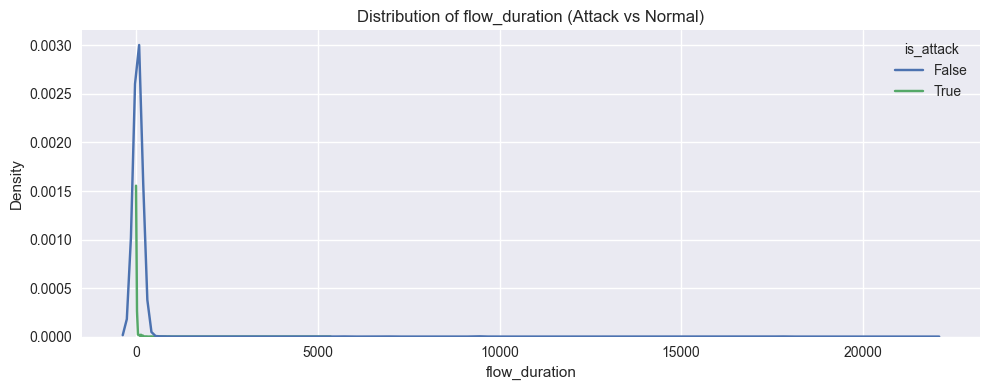

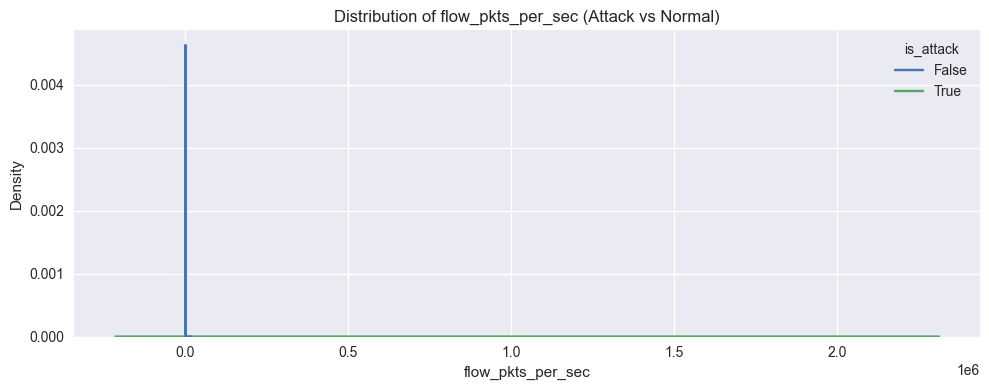

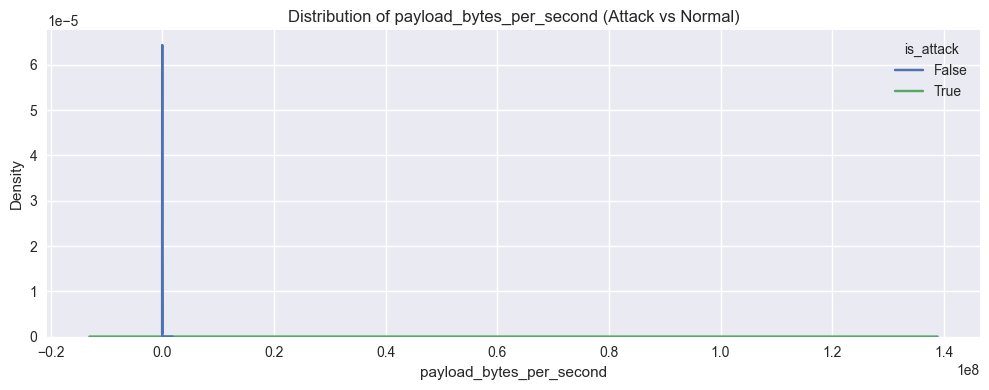

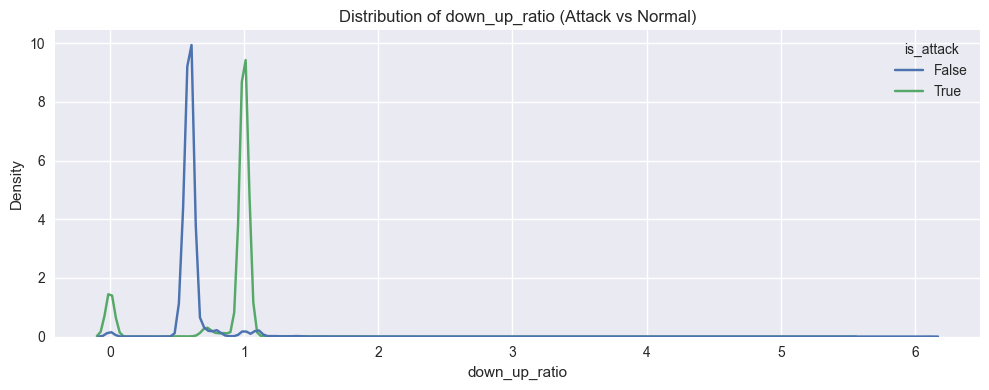

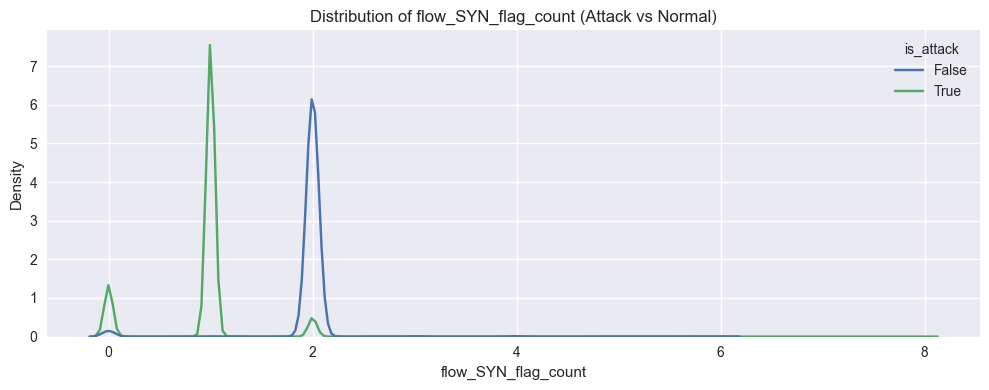

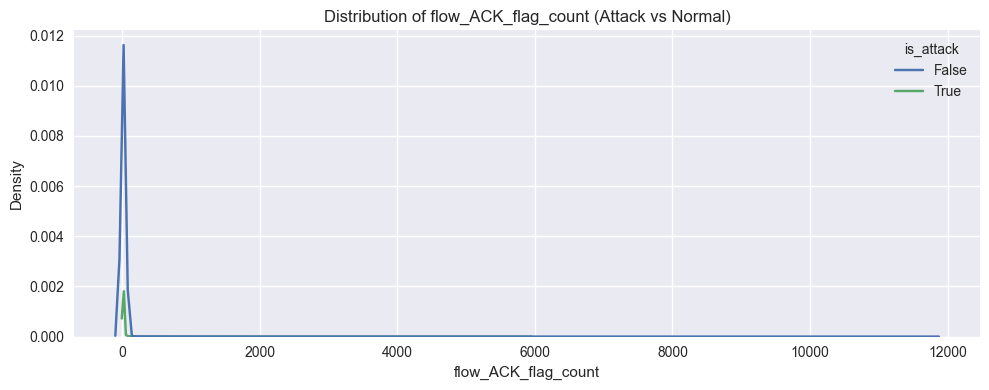

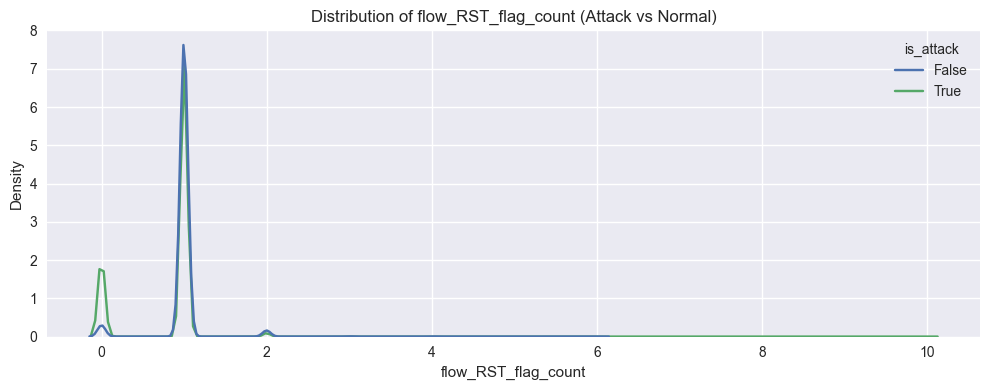

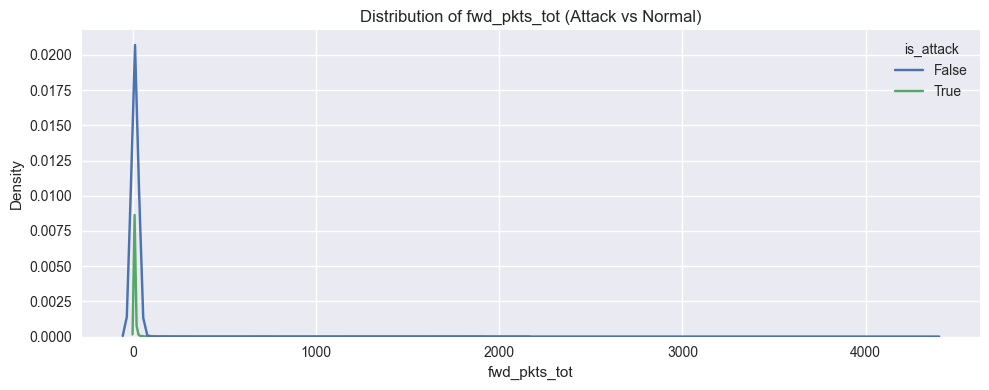

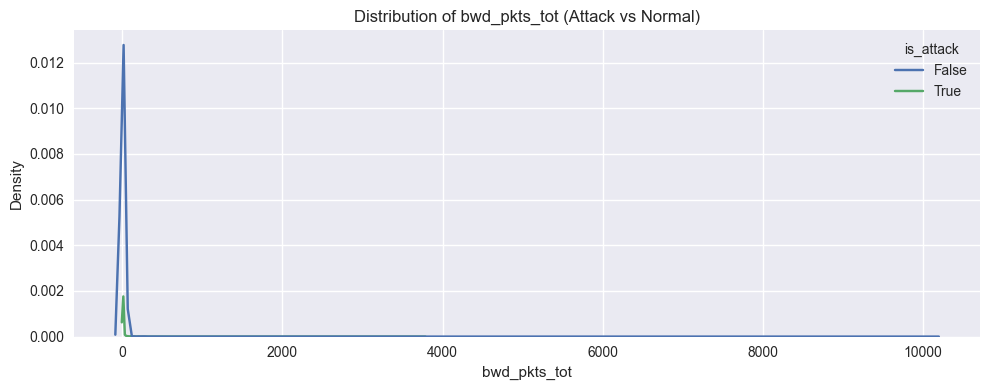

In [63]:
def eda_binary_label(df, target_col="Attack_type", normal_keywords=("MQTT", "Thing_speak", "Wipro", "Amazon-Alexa")):
    """
    Create a binary column 'is_attack' using your known normal class names.
    If you change the normal class list, update normal_keywords accordingly.
    """
    normals = []
    for val in df[target_col].unique():
        for k in normal_keywords:
            if k in str(val):
                normals.append(val)
                break
    normals = sorted(set(normals))
    df2 = df.copy()
    df2["is_attack"] = ~df2[target_col].isin(normals)
    return df2, normals

def eda_key_feature_distributions(df, target_col="Attack_type"):
    print_section("Key Feature Distributions (Attack vs Normal)")

    df2, normal_classes = eda_binary_label(df, target_col=target_col)
    print("Detected normal classes used for attack/normal split:")
    print(normal_classes)

    key_features = [
        "flow_duration",
        "flow_pkts_per_sec",
        "payload_bytes_per_second",
        "down_up_ratio",
        "flow_SYN_flag_count",
        "flow_ACK_flag_count",
        "flow_RST_flag_count",
        "fwd_pkts_tot",
        "bwd_pkts_tot",
    ]
    key_features = [c for c in key_features if c in df2.columns]

    for col in key_features:
        plt.figure(figsize=(10, 4))
        sns.kdeplot(data=df2, x=col, hue="is_attack", common_norm=False)
        plt.title(f"Distribution of {col} (Attack vs Normal)")
        plt.tight_layout()
        plt.show()

eda_key_feature_distributions(df, target_col="Attack_type")


#### TCP Flag Pattern Analysis (Security Signature EDA)
Analyze TCP flag behavior across the top attack and benign classes using average flag counts per flow. TCP flags (SYN, ACK, RST, FIN, PSH, URG, etc.) are classic NIDS indicators because they capture the handshake and teardown behavior of connections. Many attacks, especially DoS and port scans—produce distinctive flag patterns that are stable across environments and therefore useful for ML driven detection.

TCP flag statistics provide strong, class-specific behavioral fingerprint. In particular, NMAP_XMAS_TREE_SCAN exhibits the expected FIN/PSH/URG signature, and DOS_SYN_Hping shows consistent SYN-driven behavior. These patterns validate dataset quality, support the feasibility of ML-based intrusion detection, and identify TCP flag counts as high-value features for accurate and explainable detection.


Flag Pattern Analysis
Average flag counts by class (top labels):


,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count
Attack_type,,,,,,,,,,
ARP_poisioning,0.431742,0.488516,0.170839,1.953806,2.470194,12.037806,0.00000,0.0,0.000000,0.000000
DDOS_Slowloris,1.544944,2.014981,0.455056,2.953184,1.129213,9.565543,0.00000,0.0,0.000000,0.000000
DOS_SYN_Hping,0.000000,1.000000,0.897633,0.000000,0.000000,0.897633,0.00000,0.0,0.000000,0.000000
MQTT_Publish,0.011095,1.996864,0.995900,2.992041,3.748673,17.450314,0.00000,0.0,0.000000,0.000000
NMAP_OS_DETECTION,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.0,0.000000,0.000000
NMAP_TCP_scan,0.000000,1.000998,0.998004,0.003992,0.000000,1.009980,0.00000,0.0,0.000000,0.000000
NMAP_UDP_SCAN,0.054440,0.109266,0.052896,0.106564,0.000772,0.324710,0.00000,0.0,0.000000,0.000000
NMAP_XMAS_TREE_SCAN,0.999005,0.001493,0.992040,0.999005,0.000498,0.997015,0.99801,0.0,0.000000,0.000000
Thing_Speak,0.922422,0.933769,0.252343,1.107301,1.251357,7.060804,0.00000,0.0,0.012704,0.008017


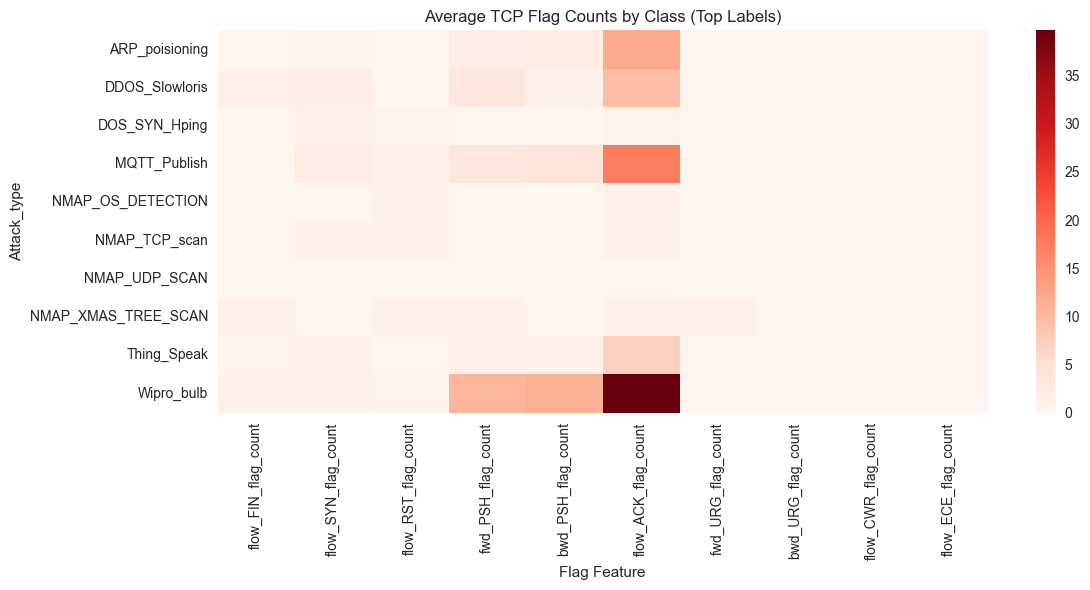

In [64]:
def eda_flag_patterns(df, target_col="Attack_type", top_labels=10):
    print_section("Flag Pattern Analysis")

    flag_cols = [c for c in df.columns if "flag_count" in c.lower()]
    if not flag_cols:
        print("No flag_count columns found.")
        return

    # Summarize average flag counts by class (top classes)
    top = df[target_col].value_counts().head(top_labels).index
    agg = df[df[target_col].isin(top)].groupby(target_col)[flag_cols].mean().sort_index()

    print("Average flag counts by class (top labels):")
    display(agg)

    plt.figure(figsize=(12, 6))
    sns.heatmap(agg, cmap="Reds")
    plt.title("Average TCP Flag Counts by Class (Top Labels)")
    plt.xlabel("Flag Feature")
    plt.ylabel(target_col)
    plt.tight_layout()
    plt.show()

eda_flag_patterns(df, target_col="Attack_type", top_labels=10)


#### Correlation Heatmap (Numeric) and  Highly Correlated Pairs
Evaluates feature correlation and redundancy among high-variance numeric variables. The correlation analysis shows that multiple flow features are mathematically redundant (especially packet-rate and timing metrics). This supports a feature-selection strategy that keeps a smaller, interpretable set of representative variables per behavioral family (rate, timing, activity), improving training efficiency and reducing the risk of overfitting to duplicated signals.


Correlation Analysis


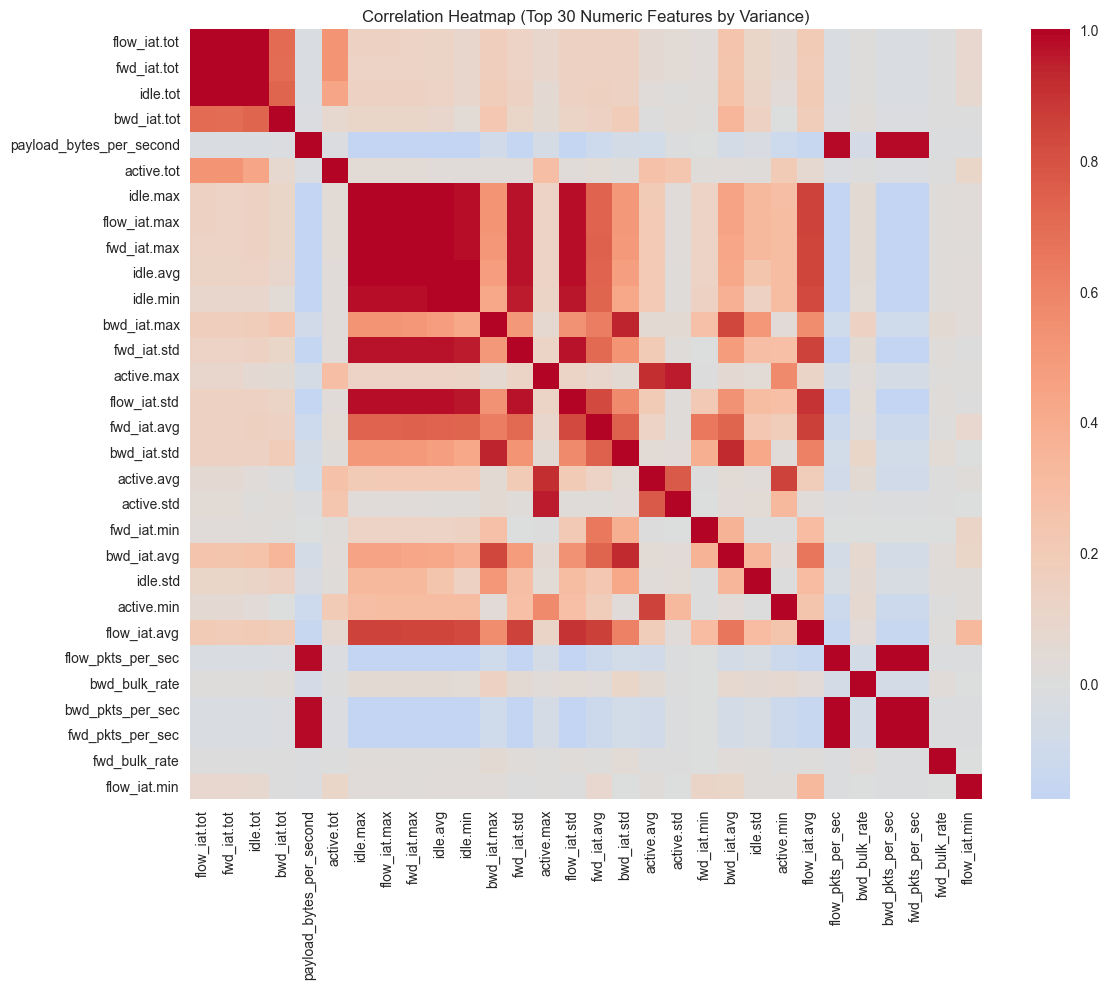


Highly correlated pairs (|corr| >= 0.9):


,feature_1,feature_2,corr
32,flow_pkts_per_sec,bwd_pkts_per_sec,0.999997
33,flow_pkts_per_sec,fwd_pkts_per_sec,0.999997
34,bwd_pkts_per_sec,fwd_pkts_per_sec,0.999986
6,idle.max,flow_iat.max,0.999748
0,flow_iat.tot,fwd_iat.tot,0.999719
12,flow_iat.max,fwd_iat.max,0.996647
7,idle.max,fwd_iat.max,0.996389
8,idle.max,idle.avg,0.995069
1,flow_iat.tot,idle.tot,0.995023
13,flow_iat.max,idle.avg,0.994813


In [65]:

def eda_correlation(df, target_col="Attack_type", max_features=30, corr_threshold=0.90):
    print_section("Correlation Analysis")

    numeric_cols, _ = get_column_groups(df, target_col=target_col)

    # Select top features by variance (to avoid plotting 56+ at once)
    variances = df[numeric_cols].var().sort_values(ascending=False)
    selected = variances.head(max_features).index.tolist()

    corr = df[selected].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title(f"Correlation Heatmap (Top {max_features} Numeric Features by Variance)")
    plt.tight_layout()
    plt.show()

    # Highly correlated pairs
    pairs = []
    cols = corr.columns
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            val = corr.iloc[i, j]
            if abs(val) >= corr_threshold:
                pairs.append((cols[i], cols[j], val))

    pairs_df = pd.DataFrame(pairs, columns=["feature_1", "feature_2", "corr"]).sort_values("corr", ascending=False)
    print(f"\nHighly correlated pairs (|corr| >= {corr_threshold}):")
    display(pairs_df)

eda_correlation(df, target_col="Attack_type", max_features=30, corr_threshold=0.90)


#### Derived Feature Exploration
Introduces and validates derived features that compress raw forward/backward flow metrics into more interpretable behavioral indicators. In an IoT NIDS setting, derived features are valuable because they often capture attacker intent more directly than raw totals. For example, a SYN flood may produce many packets with little payload, while normal application traffic tends to have more stable payload-per-packet patterns.

Derived features also help reduce redundancy by combining correlated raw fields (e.g., forward and backward totals) into a smaller set of meaningful indicators.
The derived-feature analysis confirms that dataset flows are predominantly small and repetitive (typical IoT behavior), while attack patterns are primarily expressed through tail events and structural differences. Among the derived features, payload_per_pkt appears particularly promising for distinguishing attack vs normal behavior, while header_to_payload_ratio is informative but numerically heavy-tailed and must be handled carefully. Overall, derived features provide a more interpretable and potentially more generalizable representation of network behavior for intrusion detection.



Derived Feature Exploration
Derived columns created: ['total_pkts', 'total_payload', 'payload_per_pkt', 'header_to_payload_ratio', 'pkts_estimated']


,count,mean,std,min,25%,50%,75%,max
total_pkts,123117.0,4.178334e+00,4.679888e+01,1.000000,2.000000,2.000000,2.000000,1.177300e+04
total_payload,123117.0,7.345172e+02,4.296599e+04,0.000000,120.000000,120.000000,120.000000,1.361058e+07
payload_per_pkt,123117.0,6.501019e+01,5.041215e+01,0.000000,60.000000,60.000000,60.000000,1.156085e+03
header_to_payload_ratio,123117.0,2.077244e+09,1.080572e+10,0.007293,0.333333,0.333333,0.333333,7.360000e+11
pkts_estimated,123117.0,4.043835e+00,4.680929e+01,0.000000,1.974284,1.997687,2.099249,1.177300e+04


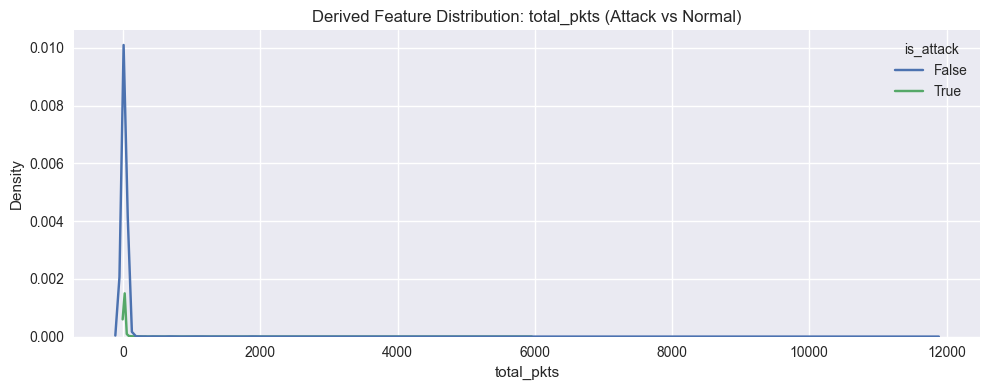

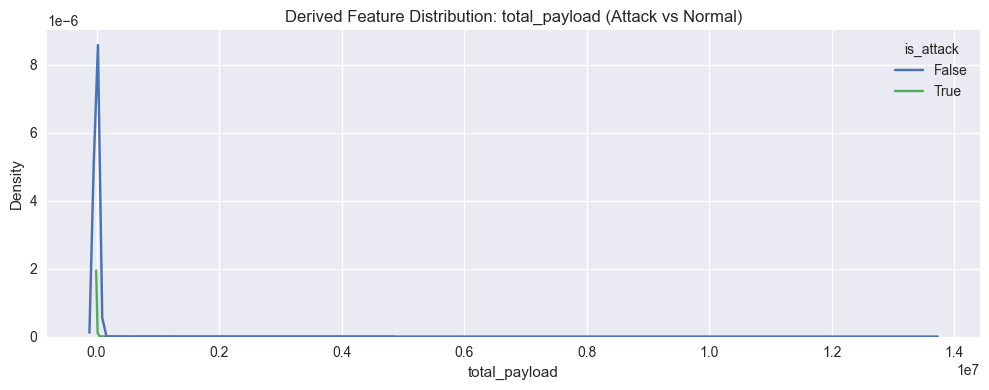

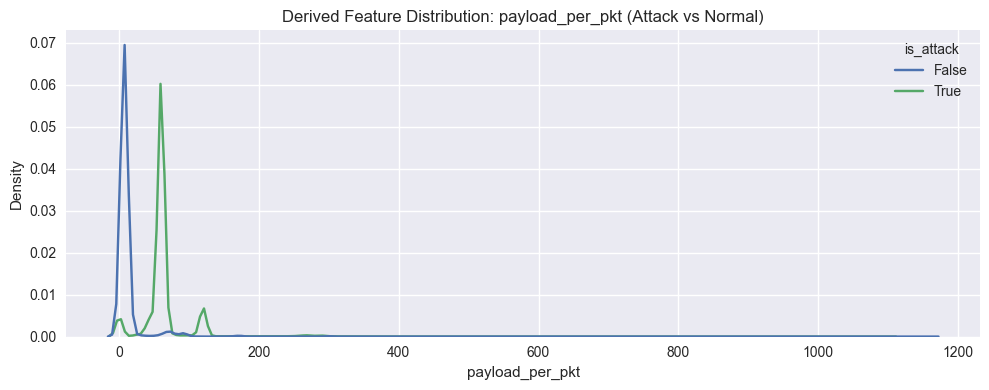

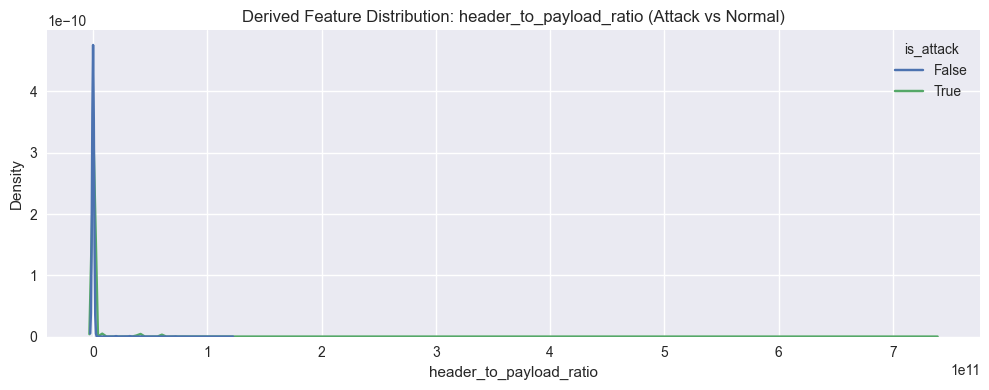

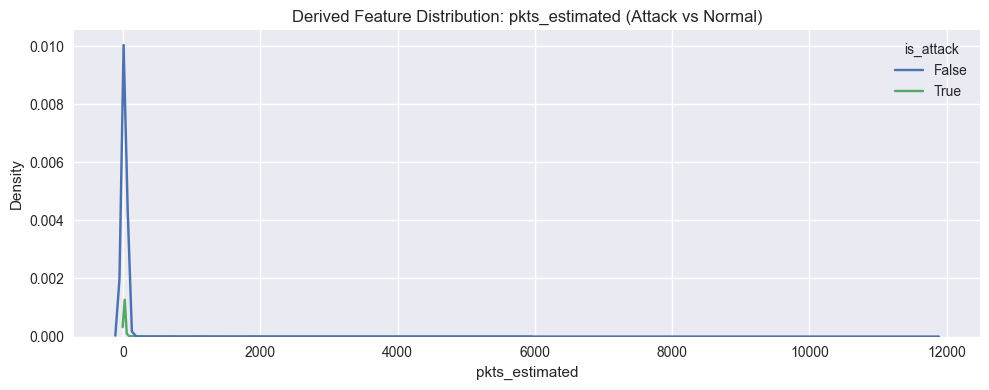

In [66]:
def add_derived_features(df):
    df2 = df.copy()

    # Basic derived signals common in flow-based IDS
    if "fwd_pkts_tot" in df2.columns and "bwd_pkts_tot" in df2.columns:
        df2["total_pkts"] = df2["fwd_pkts_tot"] + df2["bwd_pkts_tot"]

    fwd_payload = "fwd_pkts_payload.tot"
    bwd_payload = "bwd_pkts_payload.tot"
    if fwd_payload in df2.columns and bwd_payload in df2.columns:
        df2["total_payload"] = df2[fwd_payload] + df2[bwd_payload]

    if "total_payload" in df2.columns and "total_pkts" in df2.columns:
        df2["payload_per_pkt"] = df2["total_payload"] / (df2["total_pkts"] + 1e-9)

    # Header to payload ratio
    if "fwd_header_size_tot" in df2.columns and "bwd_header_size_tot" in df2.columns and "total_payload" in df2.columns:
        df2["header_to_payload_ratio"] = (df2["fwd_header_size_tot"] + df2["bwd_header_size_tot"]) / (df2["total_payload"] + 1e-9)

    # Rate consistency (duration vs packet rate)
    if "flow_duration" in df2.columns and "flow_pkts_per_sec" in df2.columns:
        df2["pkts_estimated"] = df2["flow_pkts_per_sec"] * (df2["flow_duration"] + 1e-9)

    return df2

def eda_derived_features(df, target_col="Attack_type"):
    print_section("Derived Feature Exploration")

    df2 = add_derived_features(df)
    derived_cols = [c for c in df2.columns if c in ["total_pkts", "total_payload", "payload_per_pkt", "header_to_payload_ratio", "pkts_estimated"]]

    print("Derived columns created:", derived_cols if derived_cols else "None created")

    if derived_cols:
        display(df2[derived_cols].describe().T)

        # Attack vs normal distribution using the same binary split helper
        df3, normal_classes = eda_binary_label(df2, target_col=target_col)
        for col in derived_cols:
            plt.figure(figsize=(10, 4))
            sns.kdeplot(data=df3, x=col, hue="is_attack", common_norm=False)
            plt.title(f"Derived Feature Distribution: {col} (Attack vs Normal)")
            plt.tight_layout()
            plt.show()

eda_derived_features(df, target_col="Attack_type")


#### Simple Rule-Based IDS Heuristics

Implements a small set of rule-based IDS heuristics to establish a baseline understanding of how easily attack behaviors can be detected using simple thresholds.
The rule-based IDS heuristics provide an interpretable baseline but show limited reliability in this dataset. Two rate-based heuristics did not trigger at all, while extreme_down_up_ratio triggered frequently in both benign and attack-like traffic, indicating potential for false positives. Additionally, the SYN-heavy heuristic did not detect the dominant SYN-flood class, highlighting the limitations of simple signatures in flow-based representations. 

In [67]:
def eda_rule_based_heuristics(df, target_col="Attack_type"):
    print_section("Rule-Based IDS Heuristics")

    df2, normal_classes = eda_binary_label(df, target_col=target_col)
    print("Normal classes for attack/normal split:", normal_classes)

    # Define thresholds using quantiles (data-driven and portable)
    q_pkt_rate = df2["flow_pkts_per_sec"].quantile(0.99) if "flow_pkts_per_sec" in df2.columns else None
    q_bytes_rate = df2["payload_bytes_per_second"].quantile(0.99) if "payload_bytes_per_second" in df2.columns else None

    heuristics = {}

    if q_pkt_rate is not None:
        heuristics["high_pkt_rate"] = df2["flow_pkts_per_sec"] > q_pkt_rate

    if q_bytes_rate is not None:
        heuristics["high_payload_rate"] = df2["payload_bytes_per_second"] > q_bytes_rate

    # SYN-heavy pattern (common for SYN floods): lots of SYN and low ACK
    if "flow_SYN_flag_count" in df2.columns and "flow_ACK_flag_count" in df2.columns:
        heuristics["syn_heavy_low_ack"] = (df2["flow_SYN_flag_count"] >= 3) & (df2["flow_ACK_flag_count"] == 0)

    # Extreme asymmetry pattern
    if "down_up_ratio" in df2.columns:
        heuristics["extreme_down_up_ratio"] = df2["down_up_ratio"] > df2["down_up_ratio"].quantile(0.99)

    if not heuristics:
        print("No heuristics could be computed (missing required columns).")
        return

    # Overall trigger rates
    overall = {}
    for name, mask in heuristics.items():
        overall[name] = float(mask.mean()) * 100
    print("\nOverall heuristic trigger rates (%):")
    display(pd.Series(overall).sort_values(ascending=False).to_frame("trigger_%"))

    # Trigger rates by label (top labels)
    top_labels = df2[target_col].value_counts().head(10).index
    rows = []
    for lab in top_labels:
        sub = df2[df2[target_col] == lab]
        row = {"Attack_type": lab, "count": len(sub)}
        for name, mask in heuristics.items():
            row[name] = float(mask.loc[sub.index].mean()) * 100
        rows.append(row)

    rates = pd.DataFrame(rows).sort_values("count", ascending=False)
    print("\nHeuristic trigger rates by label (%):")
    display(rates)

eda_rule_based_heuristics(df, target_col="Attack_type")



Rule-Based IDS Heuristics
Normal classes for attack/normal split: ['MQTT_Publish', 'Wipro_bulb']

Overall heuristic trigger rates (%):


,trigger_%
extreme_down_up_ratio,0.679841
syn_heavy_low_ack,0.029240
high_payload_rate,0.000000
high_pkt_rate,0.000000



Heuristic trigger rates by label (%):


,Attack_type,count,high_pkt_rate,high_payload_rate,syn_heavy_low_ack,extreme_down_up_ratio
0,DOS_SYN_Hping,94659,0.0,0.0,0.000000,0.000000
1,Thing_Speak,8108,0.0,0.0,0.000000,0.999013
2,ARP_poisioning,7750,0.0,0.0,0.322581,6.877419
3,MQTT_Publish,4146,0.0,0.0,0.024120,0.072359
4,NMAP_UDP_SCAN,2590,0.0,0.0,0.038610,0.000000
5,NMAP_XMAS_TREE_SCAN,2010,0.0,0.0,0.000000,0.000000
6,NMAP_OS_DETECTION,2000,0.0,0.0,0.000000,0.000000
7,NMAP_TCP_scan,1002,0.0,0.0,0.000000,0.000000
8,DDOS_Slowloris,534,0.0,0.0,1.123596,24.157303
9,Wipro_bulb,253,0.0,0.0,1.185771,35.573123


#### Time-Series Readiness

Current data set does not include an explicit timestamp column, so evaluates whether the dataset can still be treated as sequential by using event order (row index) as a proxy for time. This approach is common when logs are exported in chronological order but timestamps are removed or not present. In an IoT intrusion detection context, time-series readiness is important because attacks often arrive in bursts or waves.

The rolling-window analysis demonstrates strong sequential patterns in event order, including attack “regime shifts” and repeated packet-rate bursts. This confirms the dataset can support a time-series component, however, the near uniform attack intensity over most of the dataset indicates that ordering effects are significant.


Time-Series Readiness (No Timestamp)


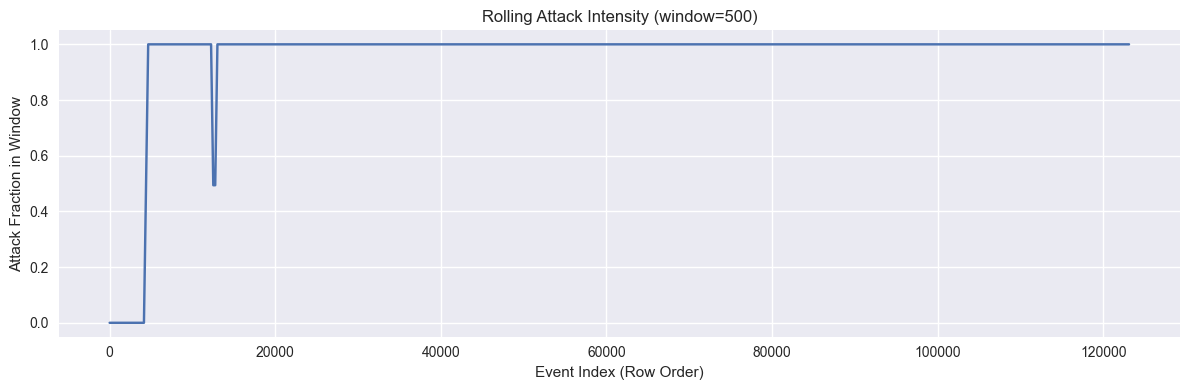

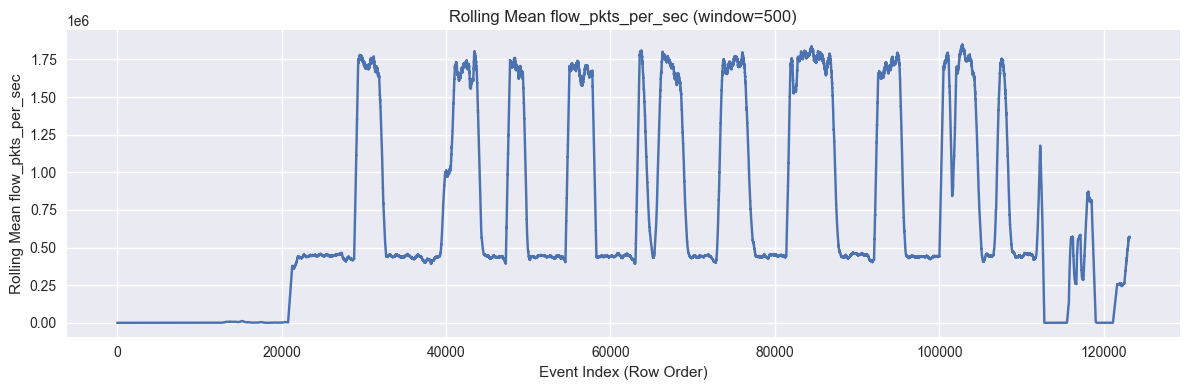

In [68]:
def eda_timeseries_readiness_no_timestamp(df, target_col="Attack_type", window=500):
    print_section("Time-Series Readiness (No Timestamp)")

    df2, normal_classes = eda_binary_label(df, target_col=target_col)

    # Create an event index
    df2 = df2.reset_index(drop=True)
    df2["event_index"] = df2.index

    # Rolling "attack intensity" (fraction of rows in window that are attacks)
    df2["attack_intensity_roll"] = df2["is_attack"].rolling(window=window, min_periods=1).mean()

    plt.figure(figsize=(12, 4))
    plt.plot(df2["event_index"], df2["attack_intensity_roll"])
    plt.title(f"Rolling Attack Intensity (window={window})")
    plt.xlabel("Event Index (Row Order)")
    plt.ylabel("Attack Fraction in Window")
    plt.tight_layout()
    plt.show()

    # Rolling packet rate (if available)
    if "flow_pkts_per_sec" in df2.columns:
        df2["pkt_rate_roll"] = df2["flow_pkts_per_sec"].rolling(window=window, min_periods=1).mean()
        plt.figure(figsize=(12, 4))
        plt.plot(df2["event_index"], df2["pkt_rate_roll"])
        plt.title(f"Rolling Mean flow_pkts_per_sec (window={window})")
        plt.xlabel("Event Index (Row Order)")
        plt.ylabel("Rolling Mean flow_pkts_per_sec")
        plt.tight_layout()
        plt.show()

eda_timeseries_readiness_no_timestamp(df, target_col="Attack_type", window=500)
